<a href="https://colab.research.google.com/github/BobZhang26/AIPI-590---XAI-Assignment-3/blob/main/XAI_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment # 3
### Description
### Bob Zhang

#### Click the badge below to direct to GitHub host:

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/BobZhang26/AIPI-590---XAI-Assignment-3/blob/main/XAI_assignment_3.ipynb)

In [110]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
#!rm -r ./sample_data
!rm -rf AIPI-590---XAI-Assignment-3

# Clone GitHub files to colab workspace
repo_name = "AIPI-590---XAI-Assignment-3" # Change to your repo name
git_path = 'https://github.com/BobZhang26/AIPI-590---XAI-Assignment-3.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
# notebook_dir = 'XAI-3'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

Cloning into 'AIPI-590---XAI-Assignment-3'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 56 (delta 21), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 1.30 MiB | 9.78 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

data.head()

<ipython-input-111-29b34266be48>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Task 1: Exploratory Analysis

### 1.1 Data Overview and Cleaning
Data contains 7043 observations with 20 independent variables and 1 dependent variable (Churn). There are apparently 3 numerical columns `SeniorCitizen`,`tenure`, and `MonthlyCharges`; the rest are categorical columns. However, `SeniorCitizen` column is a binary feature where 1 indicates senior citizens and 0 indicates not senior citizens. This should be corrected from numerical to categorical.
There is no missing value in the dataset.

In [105]:
# load the data and check each column's type: categorical or numerical
print("Check column types:")
print(data.info())
print()
print("Check column types again:")
print(data.info())
print()
# check missing values or anormalies
print("Check missing values:")
print(data.isnull().sum())
print()
# summary statistics of the data
print("Summary statistics of the data:")
print(data.describe())

Check column types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

The numerical columns are `tenure`, `MonthlyCharges` and `TotalCharges`. The rest are all categorical. Correct them from the dataframe

In [106]:
cat_cols = data.columns.difference(['tenure', 'MonthlyCharges', 'TotalCharges'])
data[cat_cols] = data[cat_cols].astype('category')

# for numerical columns
data['tenure'] = data['tenure'].astype('int64')
data['MonthlyCharges'] = data['MonthlyCharges'].astype('float64')
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan).astype('float64')

# drop the rows where TotalCharges is nan, the cleaned dataframe is df_clean
df = data.copy()
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

### 1.2 Univariate Analysis
Target Variable (Churn) Distribution: Visualize the distribution of the target variable (churn) to understand class imbalance. Use a bar chart to visualize the churn rate.



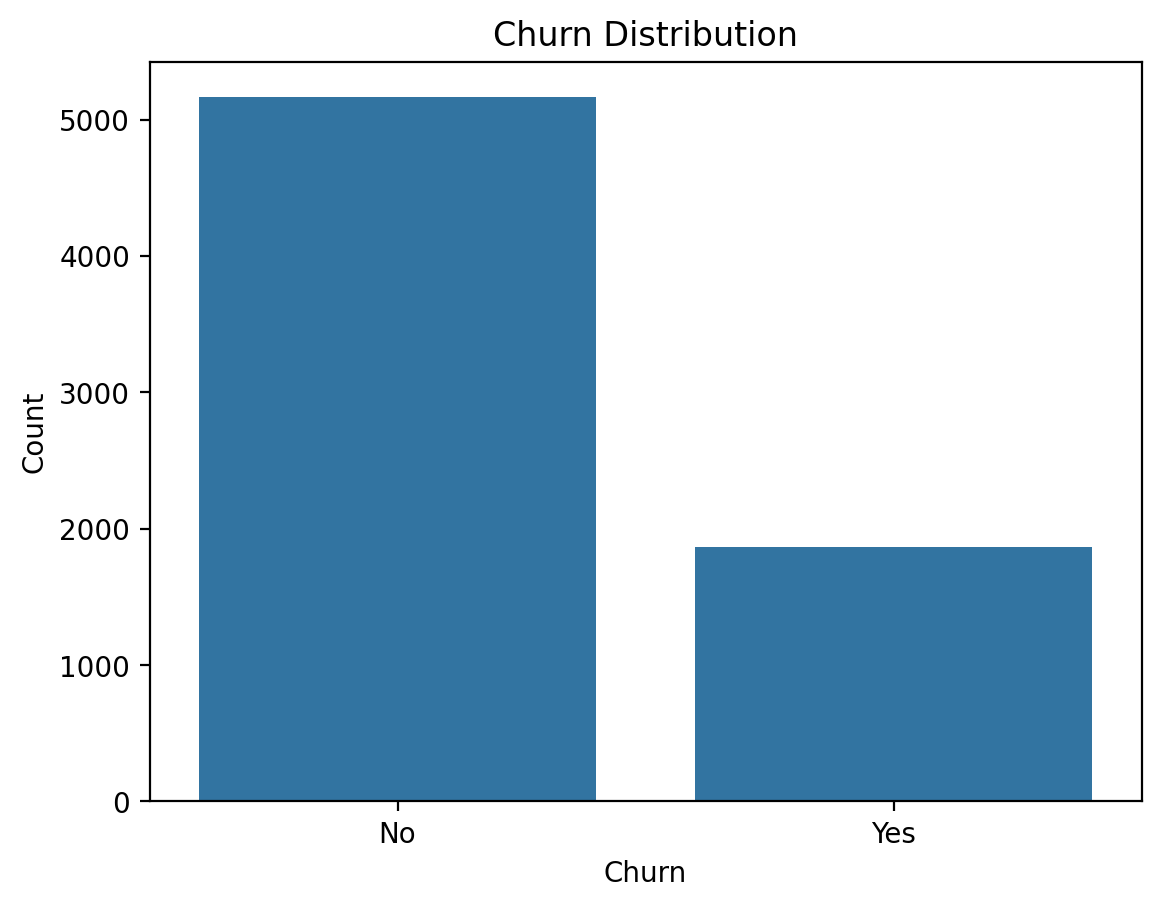

In [107]:
sns.countplot(x='Churn', data=df_clean)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

Now we are looking at the distributions of numerical variables: `tenure`and `MonthlyCharges`. This will help identify whether variables are normally distributed as to meet `linear regression assumption`.

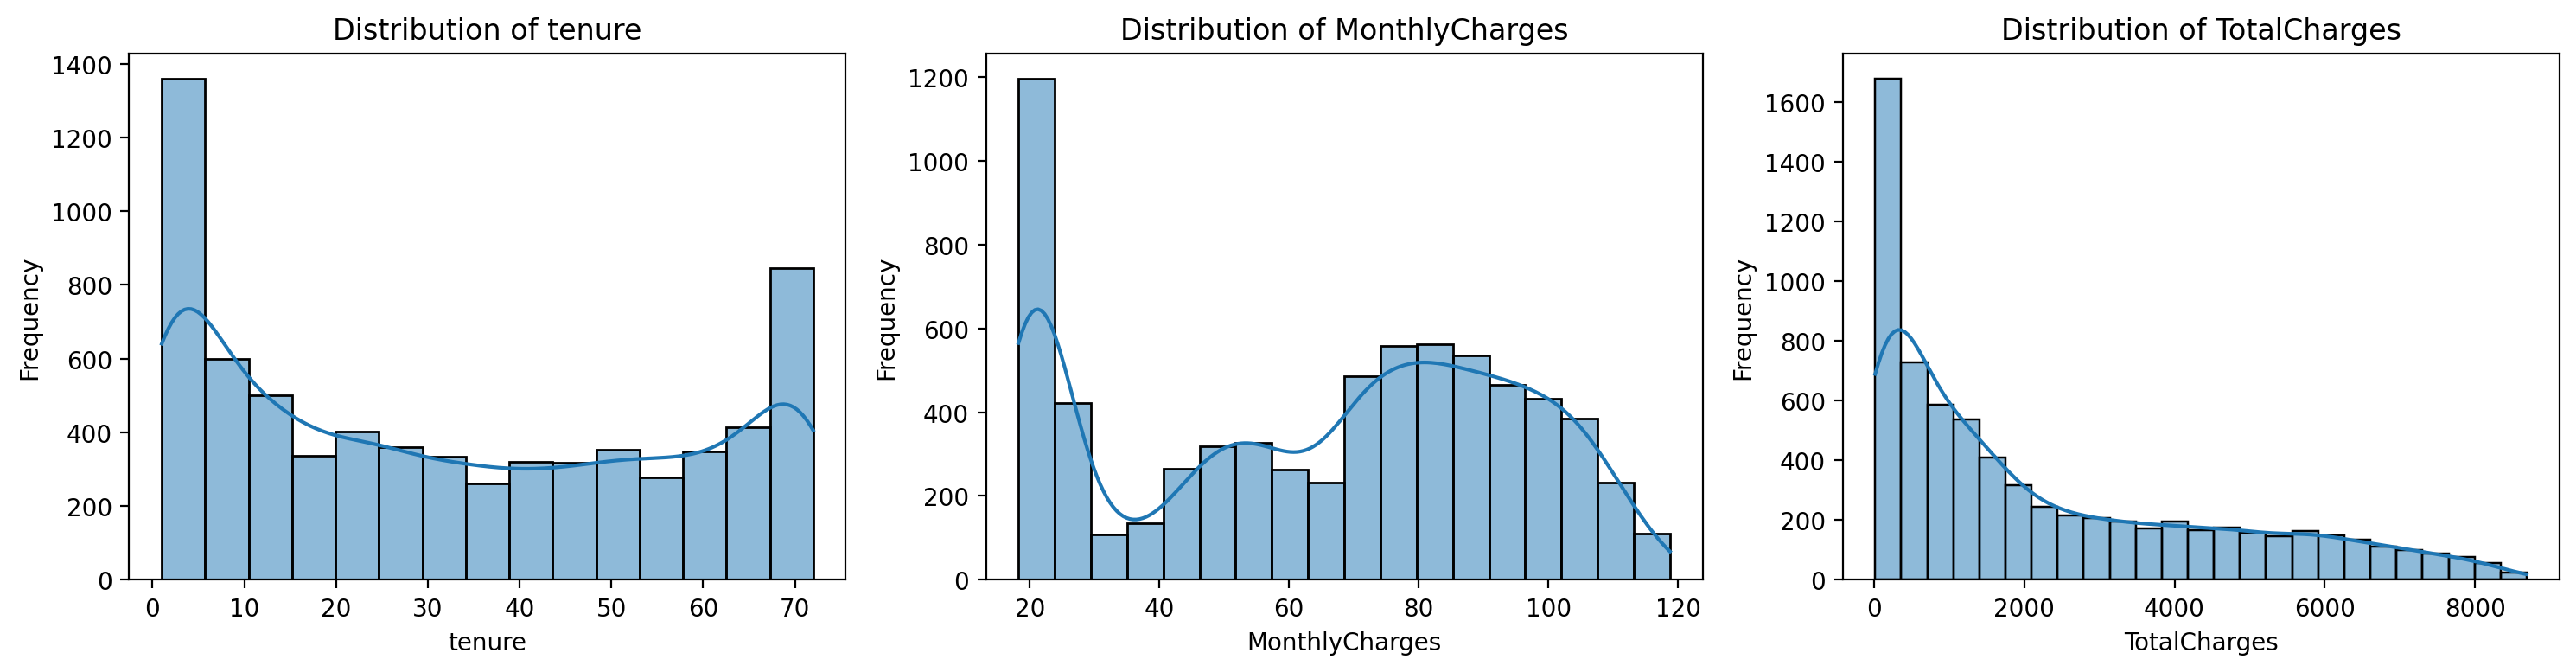

In [108]:
# Distribution of tenure, MonthlyCharges and TotalCharges
num_col = ["tenure", "MonthlyCharges","TotalCharges"]
plt.figure(figsize=(15,4))
for i,var in enumerate(num_col):
  plt.subplot(1,3,i+1)
  sns.histplot(df_clean[var], kde=True)
  plt.title(f"Distribution of {var}")
  plt.xlabel(var)
  plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

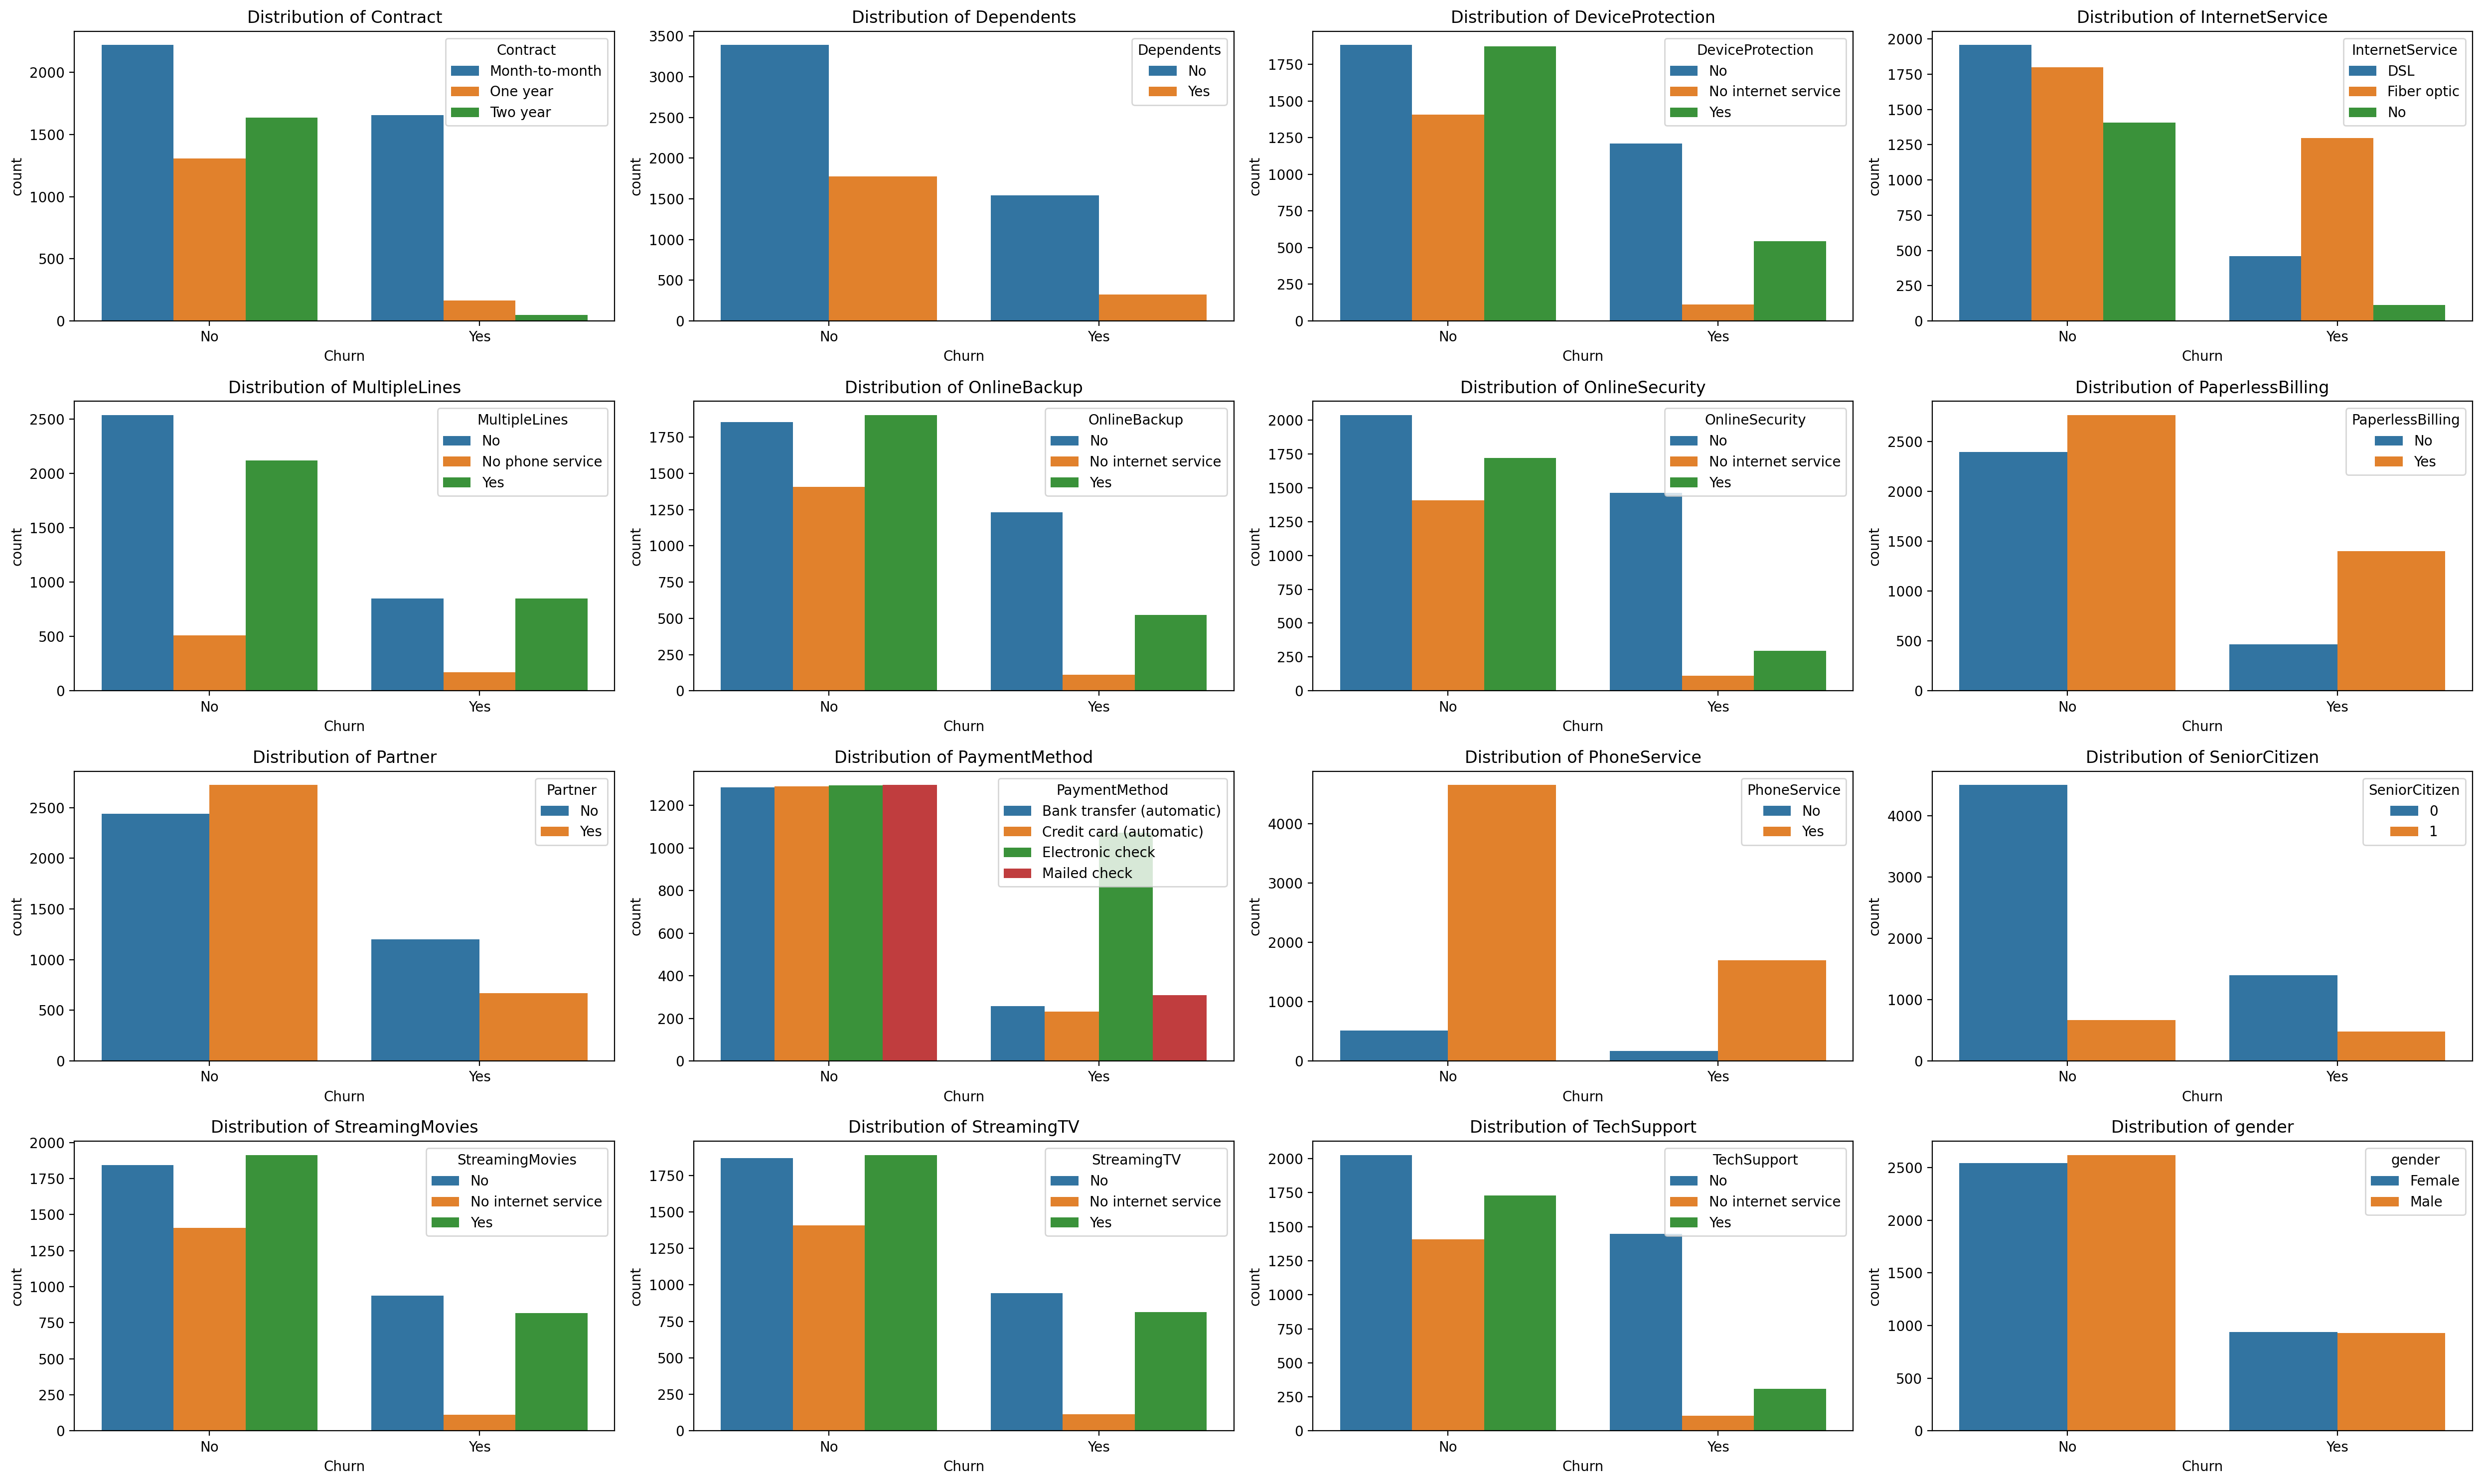

In [109]:
# Distribution of categorical variables
cat_colss = cat_cols.difference(['customerID','Churn'])
plt.figure(figsize=(25,15))
for i ,var in enumerate(cat_colss):
  plt.subplot(4,4,i+1)
  sns.countplot(x='Churn',data=df_clean, hue = var)
  plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()